In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.compose import ColumnTransformer
import warnings

In [2]:
data=pd.read_csv('Dummy Data HSS.csv')

In [3]:
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [4]:
data.shape

(4572, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [6]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [7]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.nunique()

TV                91
Radio           4568
Social Media    4566
Influencer         4
Sales           4566
dtype: int64

<Axes: >

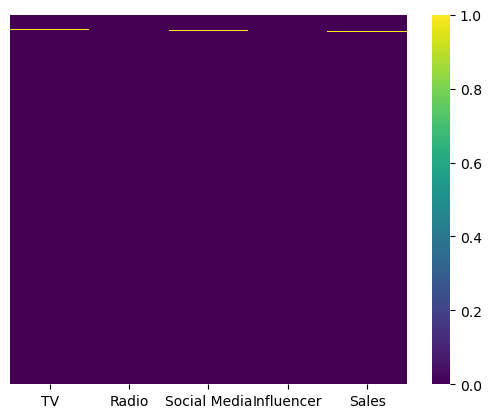

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

In [12]:
#Filling/Replacing null values

In [13]:
data.Radio.fillna(0,inplace=True)
data['Social Media'].fillna(data['Social Media'].mean(),inplace=True)
data['TV']= data['TV'].replace(np.nan,0)
data['Sales'].ffill(axis=0,inplace=True)

In [14]:
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [15]:
#Heatmap to check null values

<Axes: >

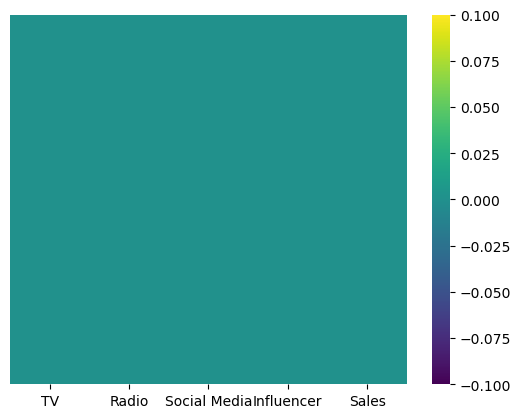

In [16]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')

Text(0.5, 0, 'TV promo budget')

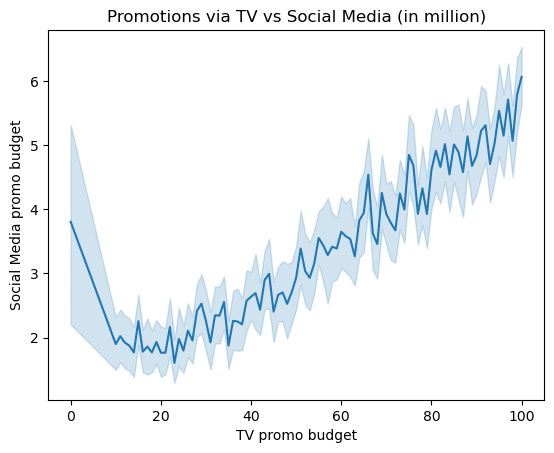

In [17]:
sns.lineplot(x='TV',y='Social Media',data=data)
plt.title('Promotions via TV vs Social Media (in million)')
plt.ylabel('Social Media promo budget')
plt.xlabel('TV promo budget')

C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


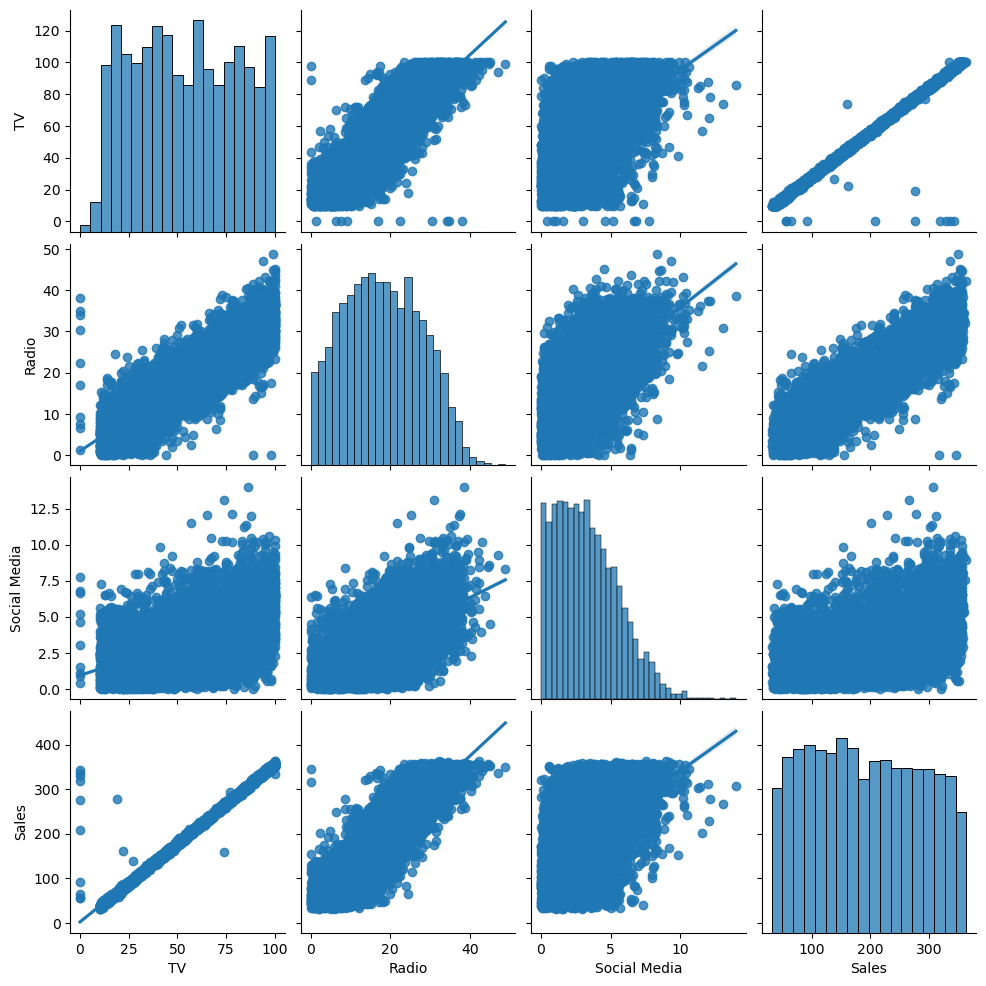

In [18]:
sns.pairplot(data=data,kind='reg')

Text(0.5, 0, 'Sales')

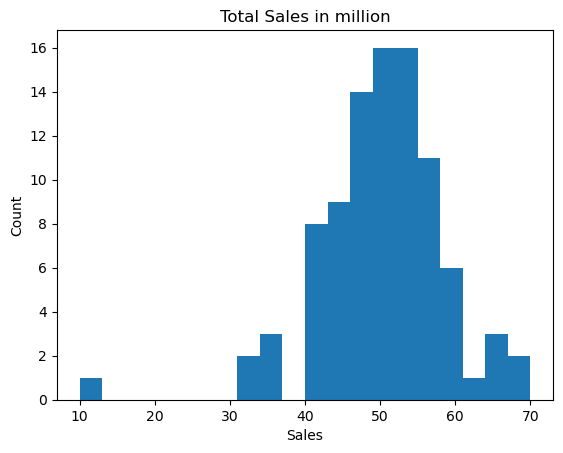

In [19]:
pd.value_counts(data['TV']).plot(kind="hist",bins=20)
plt.title('Total Sales in million')
plt.ylabel('Count')
plt.xlabel('Sales')

In [21]:
Influencers=data['Influencer'].value_counts()
Influencers

Influencer
Mega     1158
Micro    1153
Nano     1139
Macro    1122
Name: count, dtype: int64

Text(0.5, 0, 'Budget for promotion via TV')

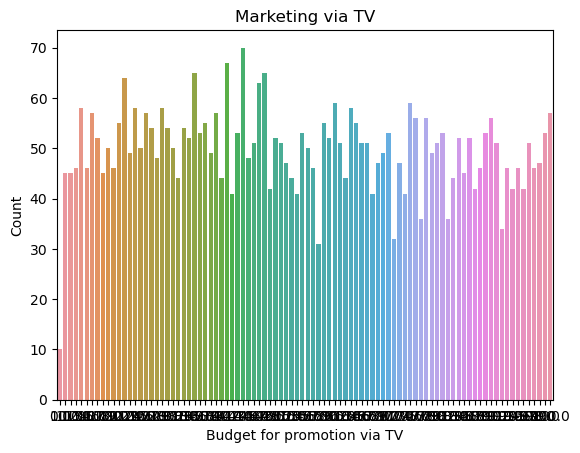

In [22]:
sns.countplot(x='TV',data=data)
plt.title('Marketing via TV')
plt.ylabel('Count')
plt.xlabel('Budget for promotion via TV')

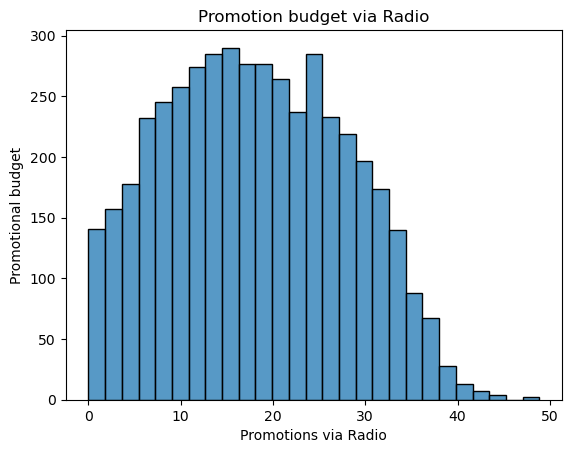

In [23]:
sns.histplot(x='Radio',data=data)
plt.xlabel('Promotions via Radio')
plt.ylabel('Promotional budget')
plt.title('Promotion budget via Radio')
plt.show()

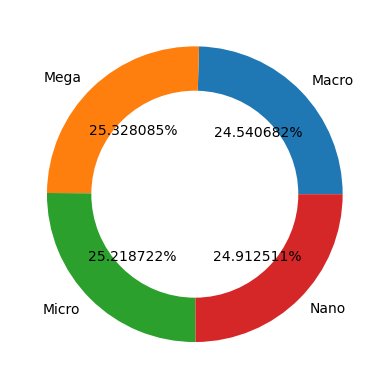

In [27]:
Influencers=data.groupby('Influencer')['Influencer'].count()
plt.pie(Influencers,labels=Influencers.index,autopct="%2f%%",wedgeprops=dict(width=0.3));
plt.show()

<Axes: xlabel='TV', ylabel='Social Media'>

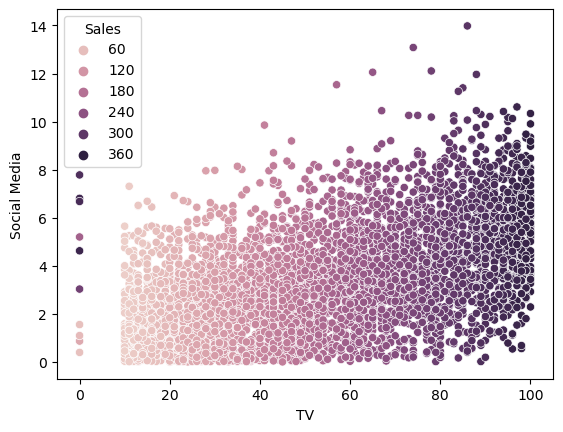

In [28]:
sns.scatterplot(x='TV',y='Social Media',data=data,hue='Sales')

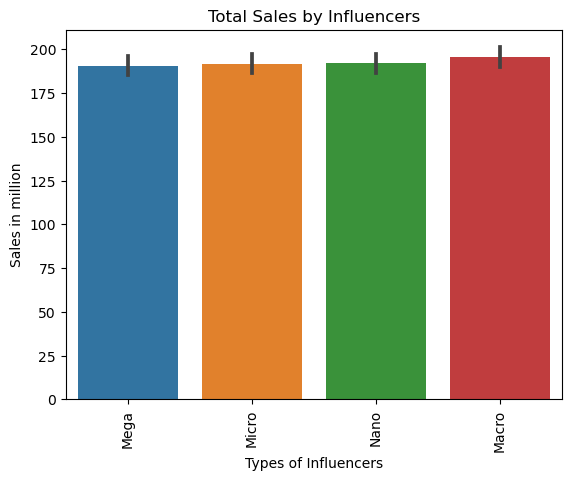

In [29]:
sns.barplot(x='Influencer',y='Sales',data=data)
xticks=plt.xticks(rotation=90)
plt.xlabel('Types of Influencers')
plt.ylabel('Sales in million')
plt.title('Total Sales by Influencers')
plt.show()

<Axes: ylabel='Social Media'>

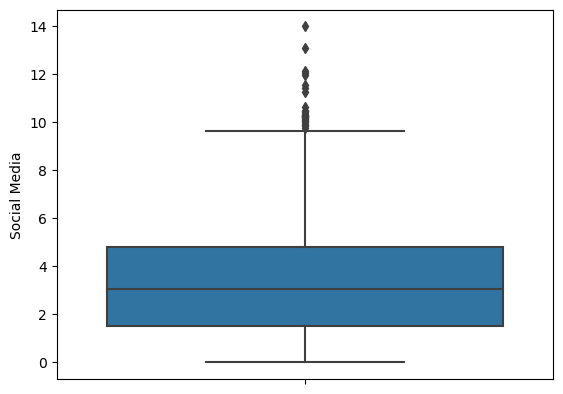

In [30]:
sns.boxplot(y='Social Media',data=data)

C:\Users\nikit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


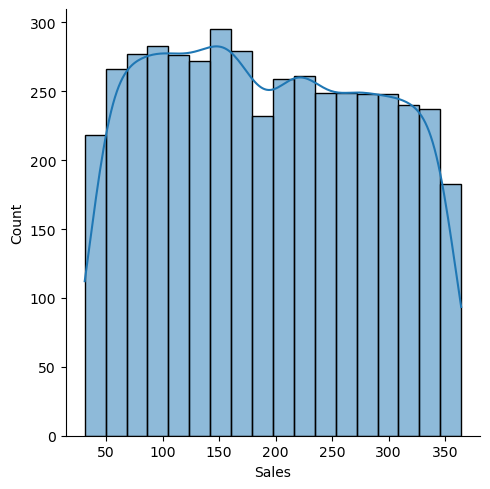

In [31]:
sns.displot(data.Sales,kde=True)

In [32]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [34]:
col=['Influencer']
encoder=OneHotEncoder(drop='first',sparse=False)
Categorical=pd.DataFrame(encoder.fit_transform(data[col]),columns=encoder.get_feature_names_out(col))

C:\Users\nikit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
Categorical

,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
4567,0.0,1.0,0.0
4568,0.0,0.0,1.0
4569,0.0,1.0,0.0
4570,0.0,0.0,0.0


In [36]:
col2=['TV','Radio','Social Media']
ss=StandardScaler()
Numericals=pd.DataFrame(ss.fit_transform(data[col2]),columns=(col2))

In [37]:
Numericals

,TV,Radio,Social Media
0,-1.447560,-1.195289,-0.188140
1,-1.561995,-0.919491,-0.413568
2,-0.493928,-0.233109,-0.185685
3,1.108173,1.225984,1.627493
4,-1.485705,-1.002117,-0.867471
...,...,...,...
4567,-1.066107,-1.411452,-1.179057
4568,0.650430,0.254602,1.457102
4569,-0.379492,0.170918,0.801563
4570,0.650430,-0.062956,-0.625553


In [38]:
X=pd.concat([Categorical,Numericals],axis=1)
Y=data['Sales']

In [39]:
X

,Influencer_Mega,Influencer_Micro,Influencer_Nano,TV,Radio,Social Media
0,1.0,0.0,0.0,-1.447560,-1.195289,-0.188140
1,1.0,0.0,0.0,-1.561995,-0.919491,-0.413568
2,1.0,0.0,0.0,-0.493928,-0.233109,-0.185685
3,1.0,0.0,0.0,1.108173,1.225984,1.627493
4,0.0,1.0,0.0,-1.485705,-1.002117,-0.867471
...,...,...,...,...,...,...
4567,0.0,1.0,0.0,-1.066107,-1.411452,-1.179057
4568,0.0,0.0,1.0,0.650430,0.254602,1.457102
4569,0.0,1.0,0.0,-0.379492,0.170918,0.801563
4570,0.0,0.0,0.0,0.650430,-0.062956,-0.625553


In [40]:
Y

0        54.732757
1        46.677897
2       150.177829
3       298.246340
4        56.594181
           ...    
4567     94.685866
4568    249.101915
4569    163.631457
4570    253.610411
4571    148.202414
Name: Sales, Length: 4572, dtype: float64

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=56)

In [42]:
model=LinearRegression()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

In [43]:
y_pred

array([140.9625519 , 269.51624429, 206.91604099, 110.47698509,
       312.2638584 ,  68.91074168, 173.79374518, 226.31927389,
        82.29220287, 169.39588043, 152.98795366, 114.53413227,
       311.46019512, 115.93953194, 281.22164409, 349.01631039,
       226.57380268, 112.61899039, 213.62307857, 135.47312852,
       341.3770057 , 306.28060478, 156.93282029, 163.92277554,
        79.626173  , 122.47630658,  78.68180785, 284.29349429,
       195.85200179, 268.5962761 ,  39.59759256, 115.27621968,
       163.27849517, 129.54667026, 256.39493212, 126.74458552,
       252.9645005 , 270.6381735 ,  72.32440859,  37.83044242,
       334.25884614,  81.64289525, 285.75351895, 118.14880429,
        70.14933219, 110.28702842, 263.87121408, 251.4939972 ,
       154.07085452, 198.30738993, 165.37154393, 180.86573444,
       283.99053439, 302.48689192, 134.74865215, 114.03327199,
       229.0425711 ,  78.98474085, 181.04549379, 121.10772459,
       256.22041668, 185.58981623,  89.6732757 , 278.59

In [44]:
MAE=mean_absolute_error(Y_test,y_pred)
MSE=mean_squared_error(Y_test,y_pred)
RMSE=np.sqrt(MSE)
r2=r2_score(Y_test,y_pred)
print('Mean Absolute Error',MAE)
print('Mean Squared Error',MSE)
print('Root Mean Squared Error',RMSE)
print('R2 Score',r2)

Mean Absolute Error 3.911254538605205
Mean Squared Error 394.68034487516564
Root Mean Squared Error 19.866563489319578
R2 Score 0.9547690278673897


In [45]:
#R2 score is 0.95 which is close to 1 which means this is a good fit

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score

In [47]:
lr_model=LinearRegression()
lr_scores=cross_val_score(lr_model,X_train,Y_train,cv=8)

In [48]:
ridge_model=Ridge(alpha=1.0)
ridge_scores=cross_val_score(ridge_model,X_train,Y_train,cv=8)

In [49]:
lasso_model=Lasso(alpha=1.0)
lasso_scores=cross_val_score(lasso_model,X_train,Y_train,cv=8)

In [50]:
lr_model.fit(X_train,Y_train)
lr_prediction=lr_model.predict(X_test)
lr_mae=mean_absolute_error(Y_test,lr_prediction)
lr_mse=mean_squared_error(Y_test,lr_prediction)
lr_rmse=np.sqrt(lr_mse)
lr_r2=r2_score(Y_test,lr_prediction)

In [51]:
print('Linear MAE:',lr_mae)
print('Linear MSE:',lr_mse)
print('Linear RMSE:',lr_rmse)
print('Linear R2:',lr_r2)

Linear MAE: 3.911254538605205
Linear MSE: 394.68034487516564
Linear RMSE: 19.866563489319578
Linear R2: 0.9547690278673897


In [52]:
lasso_model.fit(X_train,Y_train)
lasso_prediction=lasso_model.predict(X_test)
lasso_mae=mean_absolute_error(Y_test,lasso_prediction)
lasso_mse=mean_squared_error(Y_test,lasso_prediction)
lasso_rmse=np.sqrt(lasso_mse)
lasso_r2=r2_score(Y_test,lasso_prediction)

In [54]:
print('Lasso MAE:',lasso_mae)
print('Lasso MSE:',lasso_mse)
print('Lasso RMSE:',lasso_rmse)
print('Lasso R2:',lasso_r2)

Lasso MAE: 4.111197100587003
Lasso MSE: 395.0575470568387
Lasso RMSE: 19.876054614959145
Lasso R2: 0.9547257999195348


In [55]:
ridge_model.fit(X_train,Y_train)
ridge_prediction=ridge_model.predict(X_test)
ridge_mae=mean_absolute_error(Y_test,ridge_prediction)
ridge_mse=mean_squared_error(Y_test,ridge_prediction)
ridge_rmse=np.sqrt(ridge_mse)
ridge_r2=r2_score(Y_test,ridge_prediction)
print('Ridge MAE:',ridge_mae)
print('Ridge MSE:',ridge_mse)
print('Ridge RMSE:',ridge_rmse)
print('Ridge R2:',ridge_r2)

Ridge MAE: 3.9231506755987344
Ridge MSE: 394.0602652805
Ridge RMSE: 19.850951243718775
Ridge R2: 0.9548400899388368


Text(0.5, 1.0, 'Overview')

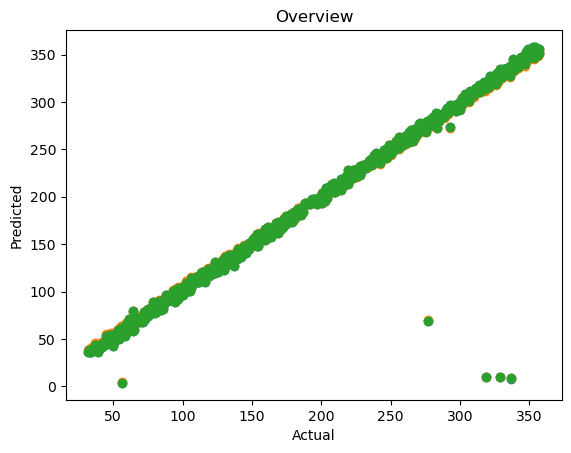

In [56]:
plt.scatter(Y_test,lr_prediction,alpha=1.0,label='Linear Regression')
plt.scatter(Y_test,lasso_prediction,alpha=1.0,label='Lasso Regression')
plt.scatter(Y_test,ridge_prediction,alpha=1.0,label='Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Overview')

In [58]:
from sklearn.linear_model import HuberRegressor
X_scaled = ss.fit_transform(X_test)
huber = HuberRegressor (epsilon=1.35)
huber.fit(X_scaled, Y_test)
huber_prediction=huber.predict(X_scaled)
huber_mae=mean_absolute_error(Y_test, huber_prediction)
huber_mse=mean_squared_error(Y_test, huber_prediction)
huber_rmse=np.sqrt(huber_mse)
huber_r2=r2_score (Y_test, huber_prediction)
print('huber mae:', huber_mae)
print('huber mse:', huber_mse)
print('huber rmse: ',huber_rmse)
print('huber r2:', huber_r2)

huber mae: 3.733599294719808
huber mse: 410.48991472573397
huber rmse:  20.260550701442792
huber r2: 0.9529572269438706


In [59]:
from sklearn.linear_model import RANSACRegressor
from sklearn.datasets import make_regression
ransac=RANSACRegressor()
mm= ransac.fit(X_test, Y_test)
mm_estimate_coeff=ransac.estimator_.coef_
mm_estimate_intercept=ransac.estimator_.intercept_
mm_prediction=ransac.predict(X_test)
print("MM Estimate Coefficients:", mm_estimate_coeff)
print("MM Estimate Intercept: ", mm_estimate_intercept)
mm_mae=mean_absolute_error(Y_test, mm_prediction)
mm_mse=mean_squared_error (Y_test, mm_prediction)
mm_rmse = np.sqrt(mm_mse)
mm_r2 = r2_score (Y_test, huber_prediction)
print('mm mae:', mm_mae)
print('mm mse:', mm_mse)
print('mm rmse:', mm_rmse)
print('mm r2:', mm_r2)

MM Estimate Coefficients: [-0.16504571 -0.31864205  0.13553676 92.8988596   0.31672082  0.15120362]
MM Estimate Intercept:  192.0389095042591
mm mae: 3.73685431526668
mm mse: 410.64820047718325
mm rmse: 20.26445657986375
mm r2: 0.9529572269438706


In [60]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor()
ransac.fit(X_test, Y_test)

RANSACRegressor()

In [61]:
lts_coef=ransac.estimator_.coef_
lts_intercept=ransac.estimator_.intercept_

In [62]:
print('LTS Estimate Coefficients:'), lts_coef
print('LTS Estimate Intercept:'), lts_intercept

LTS Estimate Coefficients:
LTS Estimate Intercept:


(None, 192.0389095042591)

In [64]:
lts_prediction=ransac.predict(X_test)
lts_mae=mean_absolute_error(Y_test,lts_prediction)
lts_mse=mean_squared_error(Y_test,lts_prediction)
lts_rmse=np.sqrt(lts_mse)
lts_r2=r2_score (Y_test,huber_prediction)
print('lts mae:',lts_mae)
print('lts mse:',lts_mse)
print('lts rmse:',lts_rmse)
print('lts r2:',lts_r2)

lts mae: 3.73685431526668
lts mse: 410.64820047718325
lts rmse: 20.26445657986375
lts r2: 0.9529572269438706


In [65]:
import statsmodels.api as sm
model=sm.RLM(Y_test, X_test, M=sm.robust.norms.HuberT())
results=model.fit()
s_estimate_intercept=results.params[0]
s_estimate_coefficient=results.params[1]
print("S-estimate Intercept: ", s_estimate_intercept)
print("S-estimate Coefficient:", s_estimate_coefficient)
s_prediction = results.predict(X_test)
s_mae=mean_absolute_error(Y_test,s_prediction)
s_mse=mean_squared_error(Y_test,s_prediction)
s_rmse = np.sqrt(s_mse)
s_r2=r2_score (Y_test, huber_prediction)
print('s mae:',s_mae)
print('s mse:',s_mse)
print('s rmse:',s_rmse)
print('s r2:',s_r2)

S-estimate Intercept:  191.8774597639434
S-estimate Coefficient: 191.78057099385728
s mae: 49.46282282711282
s mse: 9313.2380845901
s rmse: 96.50511947347717
s r2: 0.9529572269438706
